# MCP Server Discovery

Automatically discover and connect to MCP servers from your configuration.

**Features:**

- Auto-discover servers from Claude Code config
- List available tools from each server
- Connect and call tools across servers

## Understanding MCP Discovery

MCP servers can be discovered from:

- `~/.config/Claude/claude_desktop_config.json` (Claude Code)
- `~/.pml/config.yaml` (Casys PML)
- Custom config files

In [1]:
import {
  MCPClient,
  type MCPServer,
  MCPServerDiscovery,
  type MCPTool,
} from "jsr:@casys/mcp-gateway";

console.log("✅ MCP Discovery module loaded");

✅ MCP Discovery module loaded


In [2]:
// Import visualization helpers
import { displayGraphrag, graphragToMermaid, type ToolEdge } from "../lib/viz.ts";

console.log("📊 GraphRAG visualization loaded (with display functions)");

📊 GraphRAG visualization loaded (with display functions)


## Example: MCP Config Structure

This is what a typical MCP config looks like:

In [3]:
const exampleConfig = {
  "mcpServers": {
    "filesystem": {
      "command": "npx",
      "args": ["-y", "@modelcontextprotocol/server-filesystem", "/tmp"],
    },
    "brave-search": {
      "command": "npx",
      "args": ["-y", "@anthropic/mcp-server-brave-search"],
      "env": {
        "BRAVE_API_KEY": "your-api-key",
      },
    },
    "casys-gateway": {
      "command": "deno",
      "args": ["run", "--allow-all", "jsr:@casys/mcp-gateway"],
    },
  },
};

console.log("📋 Example MCP Config:");
console.log(JSON.stringify(exampleConfig, null, 2));

📋 Example MCP Config:
{
  "mcpServers": {
    "filesystem": {
      "command": "npx",
      "args": [
        "-y",
        "@modelcontextprotocol/server-filesystem",
        "/tmp"
      ]
    },
    "brave-search": {
      "command": "npx",
      "args": [
        "-y",
        "@anthropic/mcp-server-brave-search"
      ],
      "env": {
        "BRAVE_API_KEY": "your-api-key"
      }
    },
    "casys-gateway": {
      "command": "deno",
      "args": [
        "run",
        "--allow-all",
        "jsr:@casys/mcp-gateway"
      ]
    }
  }
}


## Simulating Server Discovery

Since we're in a notebook, we'll simulate what discovery looks like:

In [4]:
// Simulated discovered servers
const discoveredServers: MCPServer[] = [
  {
    name: "filesystem",
    command: "npx",
    args: ["-y", "@modelcontextprotocol/server-filesystem", "/tmp"],
    status: "available",
  },
  {
    name: "casys-sandbox",
    command: "deno",
    args: ["run", "--allow-all", "jsr:@casys/mcp-gateway"],
    status: "available",
  },
  {
    name: "database",
    command: "node",
    args: ["db-mcp-server.js"],
    status: "unavailable",
  },
];

console.log("🔍 Discovered MCP Servers:\n");
for (const server of discoveredServers) {
  const status = server.status === "available" ? "✅" : "❌";
  console.log(`${status} ${server.name}`);
  console.log(`   Command: ${server.command} ${server.args?.join(" ")}`);
  console.log();
}

🔍 Discovered MCP Servers:

✅ filesystem
   Command: npx -y @modelcontextprotocol/server-filesystem /tmp

✅ casys-sandbox
   Command: deno run --allow-all jsr:@casys/mcp-gateway

❌ database
   Command: node db-mcp-server.js



## Tools from Each Server

Each MCP server exposes different tools:

In [5]:
// Simulated tools from servers
const serverTools: Record<string, MCPTool[]> = {
  "filesystem": [
    { name: "read_file", description: "Read contents of a file", inputSchema: {} },
    { name: "write_file", description: "Write contents to a file", inputSchema: {} },
    { name: "list_directory", description: "List files in a directory", inputSchema: {} },
  ],
  "casys-sandbox": [
    { name: "execute_code", description: "Execute TypeScript/JavaScript safely", inputSchema: {} },
    { name: "execute_dag", description: "Execute a DAG workflow", inputSchema: {} },
    { name: "search_tools", description: "Semantic search for relevant tools", inputSchema: {} },
  ],
};

console.log("🔧 Tools by Server:\n");
for (const [server, tools] of Object.entries(serverTools)) {
  console.log(`📦 ${server}:`);
  for (const tool of tools) {
    console.log(`   • ${tool.name}: ${tool.description}`);
  }
  console.log();
}

🔧 Tools by Server:

📦 filesystem:
   • read_file: Read contents of a file
   • write_file: Write contents to a file
   • list_directory: List files in a directory

📦 casys-sandbox:
   • execute_code: Execute TypeScript/JavaScript safely
   • execute_dag: Execute a DAG workflow
   • search_tools: Semantic search for relevant tools



## Gateway Aggregation

The MCP Gateway aggregates all tools into a single interface:

In [6]:
// Flatten all tools with server prefix
const allTools = Object.entries(serverTools).flatMap(([server, tools]) =>
  tools.map((tool) => ({
    ...tool,
    fullName: `${server}:${tool.name}`,
    server,
  }))
);

console.log("🌐 Gateway: All Available Tools\n");
console.log(`Total: ${allTools.length} tools from ${Object.keys(serverTools).length} servers\n`);

for (const tool of allTools) {
  console.log(`${tool.fullName}`);
  console.log(`   ${tool.description}`);
  console.log();
}

🌐 Gateway: All Available Tools

Total: 6 tools from 2 servers

filesystem:read_file
   Read contents of a file

filesystem:write_file
   Write contents to a file

filesystem:list_directory
   List files in a directory

casys-sandbox:execute_code
   Execute TypeScript/JavaScript safely

casys-sandbox:execute_dag
   Execute a DAG workflow

casys-sandbox:search_tools
   Semantic search for relevant tools



## Semantic Tool Search

Find relevant tools using natural language:

🕸️ GraphRAG Tool Relationships:
💡 Higher weights = tools more frequently used together



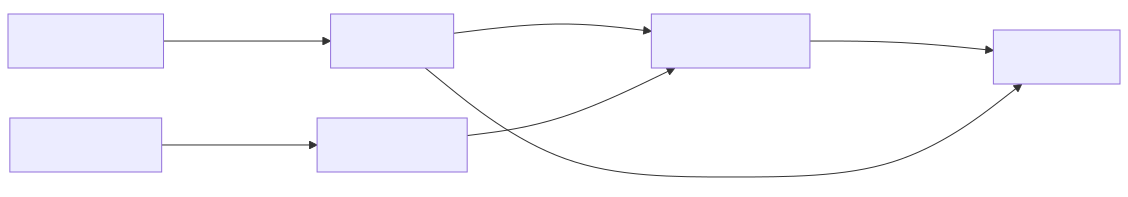

In [7]:
// Simulated GraphRAG edges (tool co-usage patterns)
const toolEdges: ToolEdge[] = [
  { source: "read_file", target: "execute_code", weight: 0.85, relationship: "often-follows" },
  { source: "search_tools", target: "execute_dag", weight: 0.72, relationship: "co-used" },
  { source: "list_directory", target: "read_file", weight: 0.68, relationship: "precedes" },
  { source: "execute_code", target: "write_file", weight: 0.55, relationship: "often-follows" },
  { source: "execute_dag", target: "execute_code", weight: 0.45, relationship: "contains" },
  { source: "read_file", target: "write_file", weight: 0.32, relationship: "co-used" },
];

console.log("🕸️ GraphRAG Tool Relationships:");
console.log("💡 Higher weights = tools more frequently used together\n");

// Display visual diagram
await displayGraphrag(toolEdges, { minWeight: 0.3 });

## Visualize GraphRAG Tool Relations

GraphRAG tracks which tools are frequently used together:

In [9]:
// Simple keyword-based search (real version uses embeddings)
function searchTools(query: string, tools: typeof allTools) {
  const keywords = query.toLowerCase().split(" ");
  return tools
    .map((tool) => {
      const text = `${tool.name} ${tool.description}`.toLowerCase();
      const score = keywords.filter((kw) => text.includes(kw)).length;
      return { ...tool, score };
    })
    .filter((t) => t.score > 0)
    .sort((a, b) => b.score - a.score);
}

const queries = [
  "execute code safely",
  "read file contents",
  "workflow dag",
];

console.log("🔍 Semantic Tool Search:\n");
for (const query of queries) {
  console.log(`Query: "${query}"`);
  const results = searchTools(query, allTools);
  for (const tool of results.slice(0, 2)) {
    console.log(`   → ${tool.fullName} (score: ${tool.score})`);
  }
  console.log();
}

🔍 Semantic Tool Search:

Query: "execute code safely"
   → casys-sandbox:execute_code (score: 3)
   → casys-sandbox:execute_dag (score: 1)

Query: "read file contents"
   → filesystem:read_file (score: 3)
   → filesystem:write_file (score: 2)

Query: "workflow dag"
   → casys-sandbox:execute_dag (score: 2)



## Summary

**MCP Discovery enables:**

- ✅ Auto-detect servers from config files
- ✅ List tools from all connected servers
- ✅ Aggregate tools into single gateway
- ✅ Semantic search across all tools

**The Gateway Pattern:**

```
                    ┌─ Server A (filesystem)
Client → Gateway ───┼─ Server B (sandbox)
                    └─ Server C (database)
```

LLMs interact with ONE gateway that routes to ALL servers!